## Chapter 5

### Identifying Backends

In [1]:
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.tools.monitor import job_monitor

print("Ch 5: Identifying backends")
print("--------------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

print("\nAvailable backends:")
print(provider.backends(operational=True, simulator=False))


select_backend=input("Type in the name of a backend: ")
backend = provider.get_backend(select_backend)
print("\nSelected backend:", backend.name())

# Create a quantum circuit to test
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

print("\nQuantum circuit:")
print(qc)

job = execute(qc, backend, shots=1000)
job_monitor(job)

result = job.result()
counts = result.get_counts(qc)

print("\nResults:", counts)

print("\nAvailable simulator backends:")
print(provider.backends(operational=True, simulator=True))

backend = provider.get_backend('ibmq_qasm_simulator')
job = execute(qc, backend, shots=1000)
job_monitor(job)

result = job.result()
counts = result.get_counts(qc)

print("\nSimulator results:", counts) 



Ch 5: Identifying backends
--------------------------
Getting provider...

Available backends:
[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]
Type in the name of a backend: ibmq_belem

Selected backend: ibmq_belem

Quantum circuit:
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 
Job Status: job is queued (3)     

KeyboardInterrupt: ignored

### Comparing Backends

In [ ]:
from qiskit import IBMQ, QuantumCircuit, execute
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from IPython.core.display import display

print("Ch 5: Comparing backends")
print("------------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

# Cceate a Bell circuit 
qc = QuantumCircuit(2,2)

qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])

print("\nQuantum circuit:")
print(qc)

# Get all available and operational backends.
backends = provider.backends(filters=lambda b: b.configuration().n_qubits > 1 and b.status().operational)

print("\nAvailable backends:", backends)

# Run the program on all backends and create a counts dictionary with the results from the executions.
counts = {}
for n in range(0, len(backends)):
    print('Run on:', backends[n])
    job = execute(qc, backends[n], shots=1000)
    job_monitor(job)
    result = job.result()
    counts[backends[n].name()] = result.get_counts(qc)

#Display the data that we want to plot.
print("\nRaw results:", counts)

#Optionally define the histogram colors. 
colors = ['green','darkgreen','red','darkred', 'orange','yellow','blue','darkblue','purple']

#Plot the counts dictionary values in a histogram, using the counts dictionary keys as legend.
display(plot_histogram(list(counts.values()), title = "Bell results on all available backends", legend=list(counts), color = colors[0:len(backends)], bar_labels = True))

### Least Busy

In [2]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

print("Ch 5: Least busy backend")
print("------------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

# Finding the least busy backend
backend = least_busy(provider.backends(operational=True, simulator=False))
print("Least busy backend:", backend.name())

filtered_backend = least_busy(provider.backends(n_qubits=5, operational=True, simulator=False))
print("\nLeast busy 5-qubit backend:", filtered_backend.name())

from qiskit.tools.monitor import backend_overview
print("\nAll backends overview:\n")
backend_overview()

Ch 5: Least busy backend
------------------------
Getting provider...
Least busy backend: ibmq_manila

Least busy 5-qubit backend: ibmq_manila

All backends overview:

ibm_oslo                     ibm_nairobi                  ibmq_manila
--------                     -----------                  -----------
Num. Qubits:  7              Num. Qubits:  7              Num. Qubits:  5
Pending Jobs: 301            Pending Jobs: 223            Pending Jobs: 140
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      104.6          Avg. T1:      120.3          Avg. T1:      143.2
Avg. T2:      100.1          Avg. T2:      62.6           Avg. T2:      62.4



ibmq_quito                   ibmq_belem                  ibmq_lima
----------                   ----------                  ---------
Num. Qubits:  5              Num. Qubits:  5             Num. Qubits:  5
Pending Jobs: 146     

### Backend Visualization

Ch 5: Backend visualization
---------------------------
Getting provider...
Getting the available backends...
Name                 #Qubits   
----                 -------   
ibmq_lima            5         
ibmq_belem           5         
ibmq_quito           5         
ibmq_manila          5         
ibm_nairobi          7         
ibm_oslo             7         
Enter the name of a backend, or X for the least busy:X

Qubit data for backend: ibmq_manila


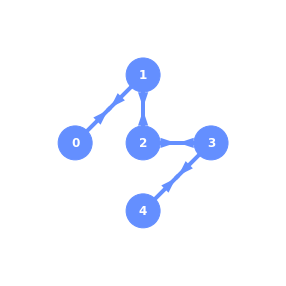

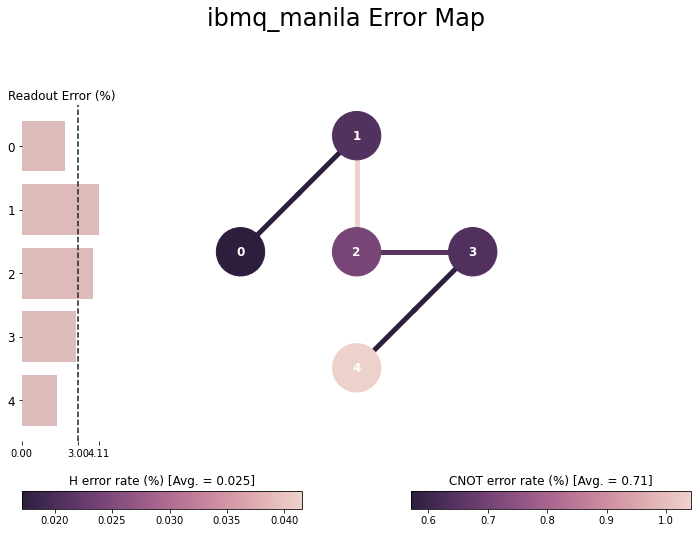

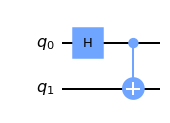

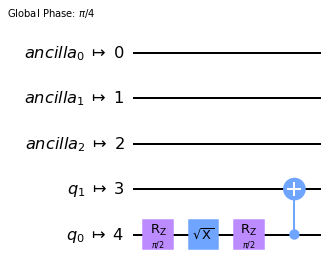

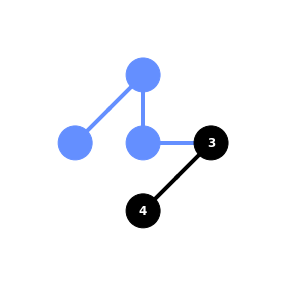

In [3]:
# Import the required Qiskit classes
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.providers.ibmq import least_busy

# Import the backend visualization methods
from qiskit.visualization import plot_gate_map, plot_error_map, plot_circuit_layout

from IPython.core.display import display

print("Ch 5: Backend visualization")
print("---------------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()

# Get all available and operational backends.
print("Getting the available backends...")
available_backends = provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().num_qubits > 1 and b.status().operational) 

# Fish out criteria to compare
print("{0:20} {1:<10}".format("Name","#Qubits"))
print("{0:20} {1:<10}".format("----","-------"))

for n in range(0, len(available_backends)):
    backend = provider.get_backend(str(available_backends[n]))
    print("{0:20} {1:<10}".format(backend.name(),backend.configuration().num_qubits))

# Select a backend or go for the least busy backend with more than 1 qubits
backend_input = input("Enter the name of a backend, or X for the least busy:")
if backend_input not in ["X","x"]:
    backend = provider.get_backend(backend_input)
else:
    backend = least_busy(provider.backends(filters=lambda b: not b.configuration().simulator and b.configuration().num_qubits > 1 and b.status().operational))
# Display the gate and error map for the backend.
print("\nQubit data for backend:",backend.status().backend_name)

display(plot_gate_map(backend, plot_directed=True))
display(plot_error_map(backend))

# Create and transpile a 2 qubit Bell circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

display(qc.draw('mpl'))
qc_transpiled = transpile(qc, backend=backend, optimization_level=3)
display(qc_transpiled.draw('mpl'))

# Display the circuit layout for the backend.
display(plot_circuit_layout(qc_transpiled, backend, view='physical'))

### Explore a Backend

In [4]:


from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

print("Ch 5: Explore a backend")
print("-----------------------")

print("Getting provider...")
if not IBMQ.active_account():
    IBMQ.load_account()
provider = IBMQ.get_provider()


# Get all available and operational backends.
available_backends = provider.backends(operational=True)

# Fish out criteria to compare
print("{0:20} {1:<10} {2:<10} {3:<10}".format("Name","#Qubits","Max exp.","Pending jobs"))
print("{0:20} {1:<10} {2:<10} {3:<10}".format("----","-------","--------","------------"))

for n in range(0, len(available_backends)):
    backend = provider.get_backend(str(available_backends[n]))
    print("{0:20} {1:<10} {2:<10} {3:<10}".format(backend.name(),backend.configuration().n_qubits,backend.configuration().max_experiments,backend.status().pending_jobs))

# Select the least busy backend with 5 qubits
least_busy_backend = least_busy(provider.backends(n_qubits=5,operational=True, simulator=False))

# Print out qubit properties for the backend.
print("\nQubit data for backend:",least_busy_backend.status().backend_name)

for q in range (0, least_busy_backend.configuration().n_qubits):
    print("\nQubit",q,":")
    for n in range (0, len(least_busy_backend.properties().qubits[0])):
        print(least_busy_backend.properties().qubits[q][n].name,"=",least_busy_backend.properties().qubits[q][n].value,least_busy_backend.properties().qubits[q][n].unit)


Ch 5: Explore a backend
-----------------------
Getting provider...
Name                 #Qubits    Max exp.   Pending jobs
----                 -------    --------   ------------
ibmq_qasm_simulator  32         300        5         
ibmq_lima            5          100        533       
ibmq_belem           5          100        92        
ibmq_quito           5          100        146       
simulator_statevector 32         300        5         
simulator_mps        100        300        5         
simulator_extended_stabilizer 63         300        5         
simulator_stabilizer 5000       300        5         
ibmq_manila          5          100        140       
ibm_nairobi          7          100        223       
ibm_oslo             7          100        300       

Qubit data for backend: ibmq_manila

Qubit 0 :
T1 = 167.13287299049122 us
T2 = 116.75694941738865 us
frequency = 4.962288181227982 GHz
anharmonicity = -0.3433479504893883 GHz
readout_error = 0.0232 
prob_meas0_prep1